# Import données

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import glob
glob.glob('data_saved/*')
# ['data_saved\\array_descripteurs.csv.npy',
#  'data_saved\\array_descripteurs_reduit.csv.npy',
#  'data_saved\\array_features_descripteurs.npy',
#  'data_saved\\data_categories.csv',
#  'data_saved\\data_final.csv',
#  'data_saved\\features_total.pickle',
#  'data_saved\\jeu_complet_kmeans.csv',
#  'data_saved\\test.csv',
#  'data_saved\\test_images_array.npy',
#  'data_saved\\train.csv',
#  'data_saved\\train_images_array.npy',
#  'data_saved\\transfer_learning_output.npy',
#  'data_saved\\X_combined.npy',
#  'data_saved\\X_reduce_NLP.csv.npy']

['data_saved\\array_descripteurs.csv.npy',
 'data_saved\\array_descripteurs_reduit.csv.npy',
 'data_saved\\array_features_descripteurs.npy',
 'data_saved\\data_categories.csv',
 'data_saved\\data_final.csv',
 'data_saved\\Images',
 'data_saved\\jeu_complet_kmeans.csv',
 'data_saved\\test.csv',
 'data_saved\\test_images_array.npy',
 'data_saved\\train.csv',
 'data_saved\\train_images_array.npy',
 'data_saved\\transfer_learning_output.npy',
 'data_saved\\X_combined.npy',
 'data_saved\\X_reduce_NLP.csv.npy']

In [7]:
data = pd.read_csv('data_saved/data_final.csv')

In [8]:
data.head()

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,X_TSNE,Y_TSNE,label
0,165,785b4383b12106dd172306d427d8f7b2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-cute-two-ca...,Rockmantra Cute Two Cats Ceramic Mug,MUGEAGGKFBTYPN4Z,499.0,349.0,785b4383b12106dd172306d427d8f7b2.jpg,False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,Coffee Mugs,Rockmantra Coffee Mugs,-19.910640,-17.716896,0
1,248,45d0af2c709de47268c80c35a117de44,2015-12-01 12:40:44 +0000,http://www.flipkart.com/malhar-niko-male-doll-...,Malhar Niko Male Doll Showpiece - 25 cm,SHIEY382SR75SXEY,6395.0,5436.0,45d0af2c709de47268c80c35a117de44.jpg,True,...,No rating available,No rating available,Malhar,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs,Showpieces,Malhar Showpieces,-16.189047,18.369432,9
2,310,64b463dc0b75ae40a848498c657041e6,2015-12-01 06:13:00 +0000,http://www.flipkart.com/linksys-smart-wi-fi-ro...,Linksys Smart Wi-Fi Router,RTRDZTF9DBT4CW8U,14999.0,13500.0,64b463dc0b75ae40a848498c657041e6.jpg,True,...,No rating available,No rating available,Linksys,"{""product_specification""=>[{""key""=>""Encryption...",Computers,Network Components,Routers,30.623508,14.635627,9
3,685,6b5cdfe68595fbcab0e05dc625d3d66a,2015-12-31 09:19:31 +0000,http://www.flipkart.com/richfeel-sunshield-spf...,Richfeel Sunshield - SPF 30 PA++,SNRE4F2GBWVF6UKR,299.0,224.0,6b5cdfe68595fbcab0e05dc625d3d66a.jpg,False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",...",Beauty and Personal Care,Body and Skin Care,Face Care,0.160292,-26.339520,0
4,843,e86daf9ebcdfc5c5dd088cdb7f8f8db6,2015-12-29 05:07:38 +0000,http://www.flipkart.com/epresent-mfan-1-fan-us...,Epresent Mfan 1 Fan USB USB Fan,USGEB3HTYWCYT2HY,269.0,219.0,e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg,False,...,No rating available,No rating available,Epresent,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,Laptop Accessories,USB Gadgets,-30.350624,-2.540635,0


# Taille des images pour visualisation

In [9]:
import cv2

def resize(img_filename, height):
    original_path = 'data/Images/'
    final_path = 'data/Resized_Images/'
    if 'Images/' in img_filename:
        img_filename = img_filename.split("Images/")[1]
    
    #chargement image
    img = cv2.imread(original_path + str(img_filename), cv2.IMREAD_UNCHANGED)
    
    #proportions de l'image
    ratio = img.shape[0]/img.shape[1]
    width = int(height / ratio)
    
    #recadrer image
    resized = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)
    
    #save image
    cv2.imwrite(str(final_path) + str(img_filename), resized)
    del width, img, ratio 
    return True

In [10]:
if False:
    from ipywidgets import IntProgress

    f = IntProgress(min=0, max=len(data['image'].tolist())) # instantiate the bar
    display(f) # display the bar
    k=0
    for image in data['image'].tolist():
        resize(image, height=150)
        k+=1
        f.value = k # signal to increment the progress bar

# Visualisation 

## Graphe fixe

In [11]:
data.head(1)

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,X_TSNE,Y_TSNE,label
0,165,785b4383b12106dd172306d427d8f7b2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-cute-two-ca...,Rockmantra Cute Two Cats Ceramic Mug,MUGEAGGKFBTYPN4Z,499.0,349.0,785b4383b12106dd172306d427d8f7b2.jpg,False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,Coffee Mugs,Rockmantra Coffee Mugs,-19.91064,-17.716896,0


In [12]:
data['retail_price'].describe()

count      1049.000000
mean       2186.197331
std        7639.229411
min          35.000000
25%         555.000000
50%         999.000000
75%        1999.000000
max      201000.000000
Name: retail_price, dtype: float64

In [13]:
data['price_as_size'] = pd.qcut(data['retail_price'], 8, labels = [3,4,5,6,7,8,9,10])

In [14]:
#data['image'] = data['image'].apply([lambda x : str(x).split('/Images/')[1]])

In [15]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Category20 as palette
from bokeh.transform import linear_cmap
from bokeh.models import  ColumnDataSource,Range1d, LabelSet, Label

In [16]:
data['label_string'] = data['label'].apply(lambda x : 'cat_'+ str(x))
liste_categories = tuple([str(x) for x in data['label_string'].unique().tolist()])
palette_sns = sns.color_palette("hls", len(liste_categories))

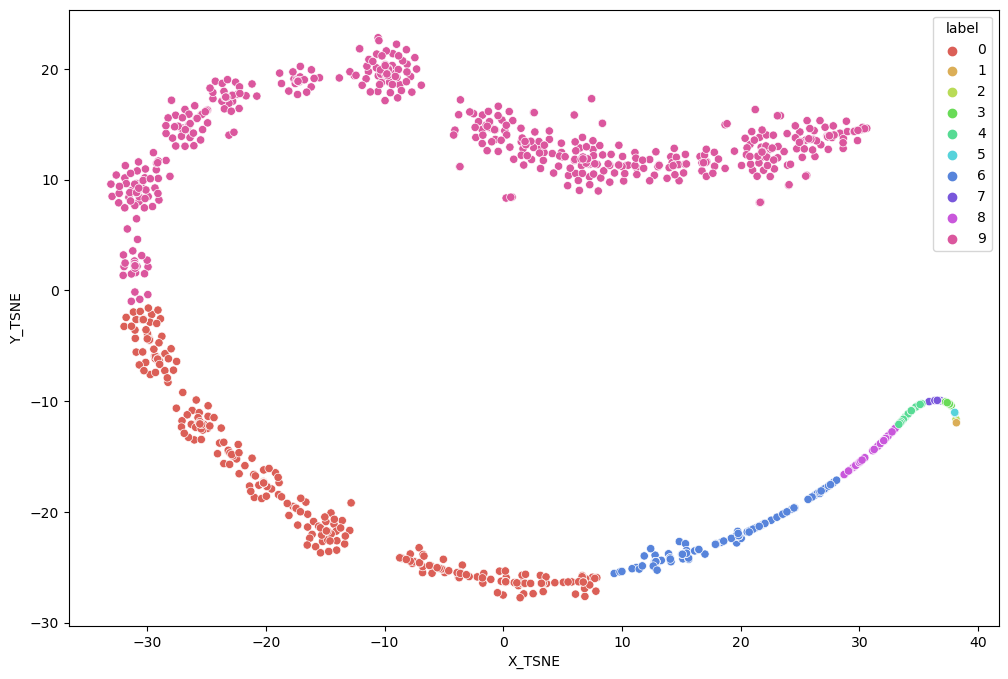

In [17]:
plt.figure(figsize=(12,8))
plt.title('')
sns.scatterplot(x = data['X_TSNE'],
               y= data['Y_TSNE'],
               hue = data['label'], 
                palette = palette_sns, 
                legend='full')
plt.show()

## Graphe interactif

In [18]:
palette[len(liste_categories)]

('#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5')

In [21]:

#create ColumnDataSource from dataframe
source = ColumnDataSource(data)

output_file('index.html')

# add plot
p = figure(
    title='Représentation de la catégorisation du jeu de données après traitement',
    #tools='',
    x_axis_label = 'TSNE X axis',
    y_axis_label = 'TSNE Y axis',
    width=1400, 
    height=800
)


colors = {}
for label, color in zip(data['label_string'].unique().tolist(), palette[len(liste_categories)]):
    colors[label] = color
    
color_map = CategoricalColorMapper(factors = list(colors.keys()),palette=palette[len(liste_categories)])

# render glyph
p.scatter('X_TSNE',
          'Y_TSNE',
#           legend='label_string',
          line_color = None,
          #fill_color= colors,
          #fill_color = colors,
          color = {'field': 'label_string', 'transform': color_map},
          source=source,
          size='price_as_size',
          line_width = 2,
)

# add text
if False:
    labels = LabelSet(x='X_TSNE', y='Y_TSNE', text='label', level='glyph',text_font_size='7pt',
                      x_offset=5, y_offset=5, source=source, render_mode='canvas')
    p.add_layout(labels)

#add tooltips
hover = HoverTool()
hover.tooltips = """
    <div>
        <div><b>@product_name</b></div>
        <div><b>@cat_lvl_2</b></div>
        </div>Kmeans Category : @label_string</div> 
        <div><img src="data/Resized_Images/@image", alt='categorie' /></div>
    </div>"""
p.add_tools(hover)

In [22]:
show(p)